In [3]:
from pandas import read_csv
from datetime import datetime

# define a function to parse dates from the string
def parse(x):
    return datetime.strptime(x, '%Y %m %d %H')

# Load data
dataset = read_csv('dataset/raw.csv', parse_dates = [['year', 'month', 'day', 'hour']], index_col = 0, date_parser = parse)
dataset.drop('No', axis= 1, inplace= True)

# Manually name the columns
dataset.columns = ['pollution', 'dew', 'temp', 'pressure', 'wnd_dir', 'wnd_spd', 'snow', 'rain']

# Use the consolidated datetime as an index
dataset.index.name = 'date'

dataset.head(5)

,pollution,dew,temp,pressure,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-01 00:00:00,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,NaN,-20,-12.0,1018.0,NW,12.97,0,0


## Data Cleaning

In [4]:
# check na values
dataset[dataset.isna().any(axis=1)]

,pollution,dew,temp,pressure,wnd_dir,wnd_spd,snow,rain
date,,,,,,,,
2010-01-01 00:00:00,NaN,-21,-11.0,1021.0,NW,1.79,0,0
2010-01-01 01:00:00,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2010-01-01 02:00:00,NaN,-21,-11.0,1019.0,NW,6.71,0,0
2010-01-01 03:00:00,NaN,-21,-14.0,1019.0,NW,9.84,0,0
2010-01-01 04:00:00,NaN,-20,-12.0,1018.0,NW,12.97,0,0
...,...,...,...,...,...,...,...,...
2014-12-20 12:00:00,NaN,-18,0.0,1030.0,NW,244.97,0,0
2014-12-20 13:00:00,NaN,-19,1.0,1029.0,NW,249.89,0,0
2014-12-20 14:00:00,NaN,-20,1.0,1029.0,NW,257.04,0,0


In [5]:
#na values in pollution column
dataset['pollution'].head(30)

date
2010-01-01 00:00:00      NaN
2010-01-01 01:00:00      NaN
2010-01-01 02:00:00      NaN
2010-01-01 03:00:00      NaN
2010-01-01 04:00:00      NaN
2010-01-01 05:00:00      NaN
2010-01-01 06:00:00      NaN
2010-01-01 07:00:00      NaN
2010-01-01 08:00:00      NaN
2010-01-01 09:00:00      NaN
2010-01-01 10:00:00      NaN
2010-01-01 11:00:00      NaN
2010-01-01 12:00:00      NaN
2010-01-01 13:00:00      NaN
2010-01-01 14:00:00      NaN
2010-01-01 15:00:00      NaN
2010-01-01 16:00:00      NaN
2010-01-01 17:00:00      NaN
2010-01-01 18:00:00      NaN
2010-01-01 19:00:00      NaN
2010-01-01 20:00:00      NaN
2010-01-01 21:00:00      NaN
2010-01-01 22:00:00      NaN
2010-01-01 23:00:00      NaN
2010-01-02 00:00:00    129.0
2010-01-02 01:00:00    148.0
2010-01-02 02:00:00    159.0
2010-01-02 03:00:00    181.0
2010-01-02 04:00:00    138.0
2010-01-02 05:00:00    109.0
Name: pollution, dtype: float64

In [6]:
#initial 24 rows have NA values, so will remove them
# drop the first 24 hours
dataset = dataset[24:]

# replace rest of the NA values with 0
dataset['pollution'].fillna(0, inplace=True)

#check if any other columns have NA values
dataset.isnull().values.any()

False

In [7]:
print(dataset.head(5))
# save to file for direct access of clean data
dataset.to_csv('dataset/pollution.csv')

                     pollution  dew  temp  pressure wnd_dir  wnd_spd  snow  \
date                                                                         
2010-01-02 00:00:00      129.0  -16  -4.0    1020.0      SE     1.79     0   
2010-01-02 01:00:00      148.0  -15  -4.0    1020.0      SE     2.68     0   
2010-01-02 02:00:00      159.0  -11  -5.0    1021.0      SE     3.57     0   
2010-01-02 03:00:00      181.0   -7  -5.0    1022.0      SE     5.36     1   
2010-01-02 04:00:00      138.0   -7  -5.0    1022.0      SE     6.25     2   

                     rain  
date                       
2010-01-02 00:00:00     0  
2010-01-02 01:00:00     0  
2010-01-02 02:00:00     0  
2010-01-02 03:00:00     0  
2010-01-02 04:00:00     0  


## Exploration

In [8]:
from matplotlib import pyplot
#load dataset
cleanedDataset = read_csv('dataset/pollution.csv', header=0, index_col=0)
dataset = cleanedDataset
print(dataset.head(5))

                     pollution  dew  temp  pressure wnd_dir  wnd_spd  snow  \
date                                                                         
2010-01-02 00:00:00      129.0  -16  -4.0    1020.0      SE     1.79     0   
2010-01-02 01:00:00      148.0  -15  -4.0    1020.0      SE     2.68     0   
2010-01-02 02:00:00      159.0  -11  -5.0    1021.0      SE     3.57     0   
2010-01-02 03:00:00      181.0   -7  -5.0    1022.0      SE     5.36     1   
2010-01-02 04:00:00      138.0   -7  -5.0    1022.0      SE     6.25     2   

                     rain  
date                       
2010-01-02 00:00:00     0  
2010-01-02 01:00:00     0  
2010-01-02 02:00:00     0  
2010-01-02 03:00:00     0  
2010-01-02 04:00:00     0  


In [9]:
# check unique values in wnd_dir column and their respective value counts
print(dataset['wnd_dir'].nunique())
dataset['wnd_dir'].value_counts()

4


SE    15290
NW    14130
cv     9384
NE     4996
Name: wnd_dir, dtype: int64

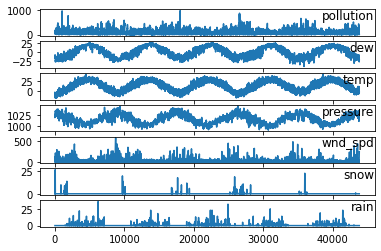

In [10]:
# convert dataset dataframe into array object
values = dataset.values 

# columns to be plotted - exclude wnd_dir since it is categorical
groups = [0,1,2,3,5,6,7]
i=1
pyplot.figure()
for group in groups:
    pyplot.subplot(len(groups), 1, i)
    pyplot.plot(values[:, group])
    pyplot.title(dataset.columns[group], y = 0.4, loc = 'right')
    i+=1
pyplot.show()

## Data Prep for LSTM
The supervised learning problem: predicting the pollution at the current hour (t) given the pollution measurement and weather conditions at the prior time step.

In [11]:
from pandas import DataFrame, concat

# a function for converting time series data into data suitable for supervised learning

def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    """
    Frame a time series as a supervised learning data set.
    Arguments:
        data: Sequence of observations as a list or NumPy array.
        n_in : number of lag observations as input(X).
        n_out: number of observations as output(Y).
        dropnan: Boolean value to drop or not to drop rows with NaN values.
    Returns:
        Pandas dataFrame of series framed for supervised learning
    """
    n_vars = 1 if type(data) is list else data.shape[1]
    df = DataFrame(data)
    cols, names = list(), list()
    # input sequence (t-n, ...t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # forcast sequence (t, t+1,..., t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if(i==0):
            names+= [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    # concatenate cols and names
    agg= concat(cols, axis=1)
    agg.columns=names
    #drop rows with NaN
    if dropnan:
        agg.dropna(inplace=True)
    return agg

        

In [12]:
    from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
    from sklearn.compose import ColumnTransformer

    # drop 'pollution' column, will later append it to maintain it's position as the first column
    df = cleanedDataset
    df = df.drop('pollution', axis=1)

    #encode wnd_dir using one hot encoder
    transformer = ColumnTransformer(
        transformers=[
            ("OneHotEncoder", # Just a name
             OneHotEncoder(drop = 'first'), # The transformer class;drop first column to avoid dummy variable trap
             [3]              # The column(s) index to be applied on.
             )
        ],
        remainder='passthrough' # donot apply anything to the remaining columns
    )
    df = transformer.fit_transform(df)

    # stack df and pollution column horizontally
    from numpy import hstack
    values = hstack((dataset[['pollution']].values, df))
    print(values.shape, values, sep='\n')


(43800, 10)
[[129.     0.     1.   ...   1.79   0.     0.  ]
 [148.     0.     1.   ...   2.68   0.     0.  ]
 [159.     0.     1.   ...   3.57   0.     0.  ]
 ...
 [ 10.     1.     0.   ... 242.7    0.     0.  ]
 [  8.     1.     0.   ... 246.72   0.     0.  ]
 [ 12.     1.     0.   ... 249.85   0.     0.  ]]


In [13]:

# ensure all data is in float
values = values.astype('float32')

# normalize features
scaler = MinMaxScaler(feature_range = (0,1))
scaled = scaler.fit_transform(values)

# Frame as supervised learning 
reframed = series_to_supervised(scaled, 1, 1, True)

reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var1(t),var2(t),var3(t),var4(t),var5(t),var6(t),var7(t),var8(t),var9(t),var10(t)
1,0.129779,0.0,1.0,0.0,0.352941,0.245902,0.527273,0.002290,0.000000,0.0,0.148893,0.0,1.0,0.0,0.367647,0.245902,0.527273,0.003811,0.000000,0.0
2,0.148893,0.0,1.0,0.0,0.367647,0.245902,0.527273,0.003811,0.000000,0.0,0.159960,0.0,1.0,0.0,0.426471,0.229508,0.545454,0.005332,0.000000,0.0
3,0.159960,0.0,1.0,0.0,0.426471,0.229508,0.545454,0.005332,0.000000,0.0,0.182093,0.0,1.0,0.0,0.485294,0.229508,0.563637,0.008391,0.037037,0.0
4,0.182093,0.0,1.0,0.0,0.485294,0.229508,0.563637,0.008391,0.037037,0.0,0.138833,0.0,1.0,0.0,0.485294,0.229508,0.563637,0.009912,0.074074,0.0
5,0.138833,0.0,1.0,0.0,0.485294,0.229508,0.563637,0.009912,0.074074,0.0,0.109658,0.0,1.0,0.0,0.485294,0.213115,0.563637,0.011433,0.111111,0.0


In [14]:
# Drop columns we don't want to predict ie, on and after column var2(t)
reframed=reframed.drop(reframed.columns[[11,12,13,14,15,16,17,18,19]], axis = 1)
reframed.head()

,var1(t-1),var2(t-1),var3(t-1),var4(t-1),var5(t-1),var6(t-1),var7(t-1),var8(t-1),var9(t-1),var10(t-1),var1(t)
1,0.129779,0.0,1.0,0.0,0.352941,0.245902,0.527273,0.002290,0.000000,0.0,0.148893
2,0.148893,0.0,1.0,0.0,0.367647,0.245902,0.527273,0.003811,0.000000,0.0,0.159960
3,0.159960,0.0,1.0,0.0,0.426471,0.229508,0.545454,0.005332,0.000000,0.0,0.182093
4,0.182093,0.0,1.0,0.0,0.485294,0.229508,0.563637,0.008391,0.037037,0.0,0.138833
5,0.138833,0.0,1.0,0.0,0.485294,0.229508,0.563637,0.009912,0.074074,0.0,0.109658


## Define and fit Model

In [15]:
# Split into train and test sets
values = reframed.values
n_train_hours = 365*24
train = values[:(n_train_hours*4), :] # train with 4 years of data
test = values[(n_train_hours*4):,:]

# Split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]

# reshape input to be 3-Dimentional [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(35040, 1, 10) (35040,) (8759, 1, 10) (8759,)


In [24]:
# define and fit LSTM model
"""
Defined the LSTM with 50 neurons in the first hidden layer
and 1 neuron in the output layer for predicting pollution.
The input shape will be 1 time step with 10 features.

Used the Mean Absolute Error (MAE) loss function
and the efficient Adam version of stochastic gradient descent.

Model is fitted for 50 training epochs with a batch size of 72.
"""
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

#design network
model = Sequential()
model.add(LSTM(50, input_shape = (train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss = 'mae', optimizer = 'adam')

# Fit network
history = model.fit(train_X, train_y, epochs=50, batch_size=72, validation_data=(test_X, test_y), verbose=2, shuffle=False)



Epoch 1/50
487/487 - 9s - loss: 0.0369 - val_loss: 0.0650 - 9s/epoch - 18ms/step
Epoch 2/50
487/487 - 4s - loss: 0.0158 - val_loss: 0.0365 - 4s/epoch - 8ms/step
Epoch 3/50
487/487 - 4s - loss: 0.0144 - val_loss: 0.0197 - 4s/epoch - 7ms/step
Epoch 4/50
487/487 - 4s - loss: 0.0141 - val_loss: 0.0164 - 4s/epoch - 8ms/step
Epoch 5/50
487/487 - 3s - loss: 0.0140 - val_loss: 0.0151 - 3s/epoch - 7ms/step
Epoch 6/50
487/487 - 3s - loss: 0.0139 - val_loss: 0.0149 - 3s/epoch - 7ms/step
Epoch 7/50
487/487 - 3s - loss: 0.0139 - val_loss: 0.0148 - 3s/epoch - 6ms/step
Epoch 8/50
487/487 - 3s - loss: 0.0139 - val_loss: 0.0153 - 3s/epoch - 6ms/step
Epoch 9/50
487/487 - 3s - loss: 0.0139 - val_loss: 0.0143 - 3s/epoch - 6ms/step
Epoch 10/50
487/487 - 3s - loss: 0.0138 - val_loss: 0.0153 - 3s/epoch - 7ms/step
Epoch 11/50
487/487 - 3s - loss: 0.0137 - val_loss: 0.0154 - 3s/epoch - 7ms/step
Epoch 12/50
487/487 - 3s - loss: 0.0138 - val_loss: 0.0139 - 3s/epoch - 6ms/step
Epoch 13/50
487/487 - 3s - loss: 0.0

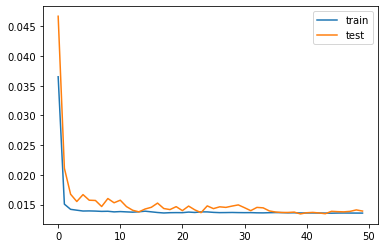

In [23]:

# plot hiostory
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

## Evaluate Model

In [187]:
from numpy import concatenate

# make a prediction
yhat = model.predict(test_X)
test_X = test_X.reshape((test_X.shape[0], test_X.shape[2]))

# invert scaling for forecast
inv_yhat = concatenate((yhat, test_X[:, 1:]), axis=1)
inv_yhat = scaler.inverse_transform(inv_yhat)
inv_yhat = inv_yhat[:,0]

# invert scaling for actual
test_y = test_y.reshape((len(test_y), 1))
inv_y = concatenate((test_y, test_X[:, 1:]), axis=1)
inv_y = scaler.inverse_transform(inv_y)
inv_y = inv_y[:,0]


In [188]:
# calculate RMSE
from math import sqrt

rmse = sqrt(mean_squared_error(inv_y, inv_yhat))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 25.004
